In [1]:
import pandas as pd
data = pd.read_csv("/content/Heart.csv")
print(data)

     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0  

In [2]:
data.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [3]:
data["Ca"]=data["Ca"].fillna(0)
data["Thal"]=data["Thal"].fillna("0")

In [4]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["ChestPain"]=b.fit_transform(data["ChestPain"])
data["Thal"]=b.fit_transform(data["Thal"])
data["AHD"]=b.fit_transform(data["AHD"])
print(data)

     Unnamed: 0  Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1          3     145   233    1        2    150   
1             2   67    1          0     160   286    0        2    108   
2             3   67    1          0     120   229    0        2    129   
3             4   37    1          1     130   250    0        0    187   
4             5   41    0          2     130   204    0        2    172   
..          ...  ...  ...        ...     ...   ...  ...      ...    ...   
298         299   45    1          3     110   264    0        0    132   
299         300   68    1          0     144   193    1        0    141   
300         301   57    1          0     130   131    0        0    115   
301         302   57    0          2     130   236    0        2    174   
302         303   38    1          1     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca  Thal  AHD  
0        0      2.3      3  0.0     1    0  
1        

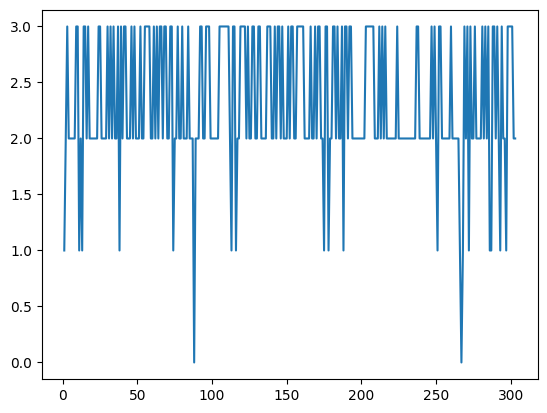

In [5]:
from matplotlib import pyplot as plt
plt.plot(data["Unnamed: 0"],data["Thal"])

In [6]:
x=data.drop("AHD",axis=1)
y=data["AHD"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)
print(xtrain)
print(ytrain)

     Unnamed: 0  Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
261         262   58    0          2     136   319    1        2    152   
8             9   63    1          0     130   254    0        2    147   
252         253   64    1          0     128   263    0        0    105   
26           27   58    0          1     120   340    0        0    172   
180         181   48    1          0     124   274    0        2    166   
..          ...  ...  ...        ...     ...   ...  ...      ...    ...   
107         108   57    1          1     128   229    0        2    150   
164         165   48    1          1     124   255    1        0    175   
63           64   54    0          1     135   304    1        0    170   
25           26   50    0          1     120   219    0        0    158   
118         119   63    1          0     130   330    1        2    132   

     ExAng  Oldpeak  Slope   Ca  Thal  
261      0      0.0      1  2.0     2  
8        0      1.4

In [11]:
from xgboost import XGBClassifier
br=XGBClassifier()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

In [12]:
data=br.predict([[304,60,1,0,130,10,0,3,153,0,2.01,3,1,0]])
print(data)

[1]


In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

[[22  6]
 [ 5 28]]
0.819672131147541
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

